<img width="300px" src="https://thevalley.es/media-kit/TheValley_horizontal.png"></img>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introducción a los modelos no supervisados

## Concepto de aprendizaje no supervisado

<img width="500px" src="https://storage.googleapis.com/jz-example-data/img/mapa-ml.png"></img>

Los algoritmos de aprendizaje no supervisado tienen como objetivo **aprender patrones de la estructura de los datos**.

A diferencia del aprendizaje supervisado en el aprendizaje no supervisado **los datos no están etiquetados**, es decir, no tenemos una variable objetivo que queramos predecir.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/supervised-vs-unsupervised.png"></img>

Los algoritmos de aprendizaje no supervisado pueden **aportar un valor en sí mismo** o **utilizarse como un paso previo para el entrenamiento de un modelo supervisado**.

## Tipos de aprendizaje no supervisado

### Clustering

El análisis cluster o simplemente *clustering* tiene como objetivo **agrupar observaciones** de manera que:

- **Dentro de un mismo grupo** las observaciones sean lo más ***similares*** posible.

- Las observaciones que se encuentran en **grupos distintos** son lo más ***distintas*** entre ellas posible.

Para evaluar la **similitud** entre dos muestras utilizamos alguna **métrica de distancia** entre las variables que las caracterizan.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/ilustracion-clustering.png"></img>

Algunos ejemplos de **casos de uso** de algoritmos de clustering son:

- Segmentación de clientes, por ejemplo para diseñar distintos tipos de tarifas o servicios.

En una compañia *Telco*, podríamos por ejemplo *clusterizar* a los clientes por minutos de llamadas al mes, *sms* enviados, consumo de datos... y así poder diseñar distintos tipos de tarifa que se adecúen más al comportamiento de los clientes.

- Organización de información por temáticas.

En un centro de ayuda a clientes, podríamos hacer un modelo de clustering de las llamadas más comunes y tener operadores especializados en cada una de ellas. Cada vez que entre una llamada nueva, la asignaríamos al cluster existente y se pasaría directamente al operador en cuestión.

- Reducir el número de observaciones de un dataset de entrenamiento para un modelo supervisado.

Un caso real es el diseño de un sistema para decidir la localización óptima para abrir una tienda dentro de una ciudad. En este caso utilizamos los datos del catastro para obtener información de dónde está localizada la población. Estos datos vienen a nivel *parcela* que es una resolución demasiado alta para el caso de uso en cuestión. Para reducir la cantidad de observaciones se utilizó un modelo de clustering basado en densidades.

### Detección de anomalias

El objetivo de un algoritmo de detección de anomalias (también denominadas *outliers*) es la **detección de muestras que se desvían significativamente del resto de los datos**.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/ilustracion-anomaly-detection.png"></img>

Ejemplos de **casos de uso**:

- Control de tráfico en una aplicación web

Diseño de un sistema de alerta ante comportamientos anómalos de usuarios. *Scrapping* de información, ataques DoS... Ante un comportamiento anómalo se puede bloquear la IP del usario y evitar estos problemas.

- Mantenimiento predictivo de maquinária industrial

En la actualidad gran parte de la maquinaria industrial cuenta con sensores IoT que miden sus condiciones de operación: temperaturas, presiones, rpm... . Se puede diseñar un sistema que, ante un comportamiento anómalo de alguna de las máquinas, envié una alerta a un operario para que pueda revisarla antes de un fallo.

- Eliminación de outliers previo al entrenamiento de un modelo supervisado.

Muchas veces los casos de uso de detección de anomalías pueden solaparse con un sistema supervisado de clasificación.

La diferencia radica en que en modelos de clasificación buscamos un comportamiento específico y sabemos qué muestras se comportan de esa manera y qué muestras no.

<img width="500px" src="https://storage.googleapis.com/jz-example-data/img/anomalias-clasificacion.png"></img>

### Reducción dimensional

Las técnicas de reducción dimensional tratan de **transformar los datos desde un espacio de alta dimensionalidad** (datos con muchas columnas) a un espacio de dimensionalidad menor, **reteniendo una parte significativa de la información** contenida en ellos.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/ilustracion-reduccion-dimensional.png"></img>

Estas técnicas son especialmente útiles en datasets con un gran número de atributos con información muy dispersa entre ellos.

Un ejemplo de información dispersa es un dataset en el que cada observación es un cliente y cada columna es un producto.

En cada columna sólo tenemos si un cliente ha comprado o no ese producto.

En general este dataset contendra muchos ceros (será muy sparse) pero se puede sacar mucha información del mismo.

- Reducción de variables en problemas de apredizaje supervisado, sobretodo en el caso de tener columnas con información muy dispersa.

- Visualización de datos con gran dimensionalidad. Podemos reducir la dimensionalidad para poder visualizar patrones en los datos.

## Construcción de un modelo no supervisado

In [ ]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

X = iris_dataset.data

#### Definición del algoritmo

La primera parte para crear un modelo con la librería `sklearn` tras importar el algoritmo es **construir el objeto** que lo representa.

En el constructor se han de especificar los hiperparámetros, que varían según el modelo utilizado.

Llamamos **hiperparámetros** de un modelo a aquellos valores que controlan algún aspecto del comportamiento del algoritmo pero **no son aprendidos directamente de los datos**.

Generalmente, la mayoría de los modelos en `sklearn` pueden ser construidos sin especificar unos hiperparámetros concretos ya que vienen con unos valores por defecto. Sin embargo, siempre es recomendable especificar los más importantes para tener más control sobre el comportamiento del modelo.




In [ ]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=3)

Podemos recuperar los valores de los hiperparámetros de cada modelo accediendo al atributo en cuestión una vez el objeto está construido.

#### Entrenamiento



La fase de entrenamiento es donde se modifican los **parámetros internos** del modelo **a partir de los datos** de entrenamiento.

Como hemos visto, en modelos no supervisados el algoritmo sólo aprende de la matriz de atributos, no necesita una etiqueta asociada a las observaciones.

Para ello, en `sklearn` utilizamos el método `fit` del objeto construido,pasándole como argumento la matriz de atributos.

In [ ]:
cluster_model = cluster_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Una vez entrenado el modelo, podémos recuperar los parámetros que se han generado a partir de los datos de entrenamiento.

Estos parámetros son específicos del modelo utilizado.

En la nomenclatura de `sklearn` el nombre del parámetro entrenado siempre acaba con una barra baja para distinguirlos de los hiperparámetros.

In [ ]:
cluster_model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

En general, en modelos de clustering, en el entrenamiento además se asignan las etiquetas (índice de cluster al que pertenece cada muestra) a las muestras con las que hemos entrenado.

Se puede acceder a ellas mediante el atributo `labels_`

In [ ]:
cluster_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
df = pd.DataFrame(data = X, columns=iris_dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df["CLUSTER_ID"] = cluster_model.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLUSTER_ID
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2



#### Persistencia del modelo

En proyectos reales, es común **persistir los modelos** en un archivo para poder utilizarlos a posteriori en la fase de predicción sin tener que volver a reentrenarlo, ya que los tiempos de entrenamiento y por tanto el coste computacional suelen ser altos.

Para ello se pueden utilizar distintas librerías, siendo las mas comunes `pickle`, que pertenece a la librería estándar, o `joblib` que es una librería externa.

*Nota: Ambas librerías pueden persister cualquier objeto de `python`, no se limitan a los modelos de `sklearn`.*

In [ ]:
# Método 1: Utilizando la librería estandar de python: pickle
import pickle

# Escritura a disco
with open("modelo_persistido.pkl", "wb") as file:
  pickle.dump(cluster_model, file)

# Lectura del archivo
with open("modelo_persistido.pkl", "rb") as file:
  retrieved_model = pickle.load(file)

retrieved_model

KMeans(n_clusters=3)

In [ ]:
# Método 2: Utilizando la libreria joblib

import joblib

# Escritura a disco
joblib.dump(cluster_model, "modelo_persistido.joblib")

# Lectura del modelo
retrieved_model = joblib.load("modelo_persistido.joblib")

retrieved_model

KMeans(n_clusters=3)


#### Predicción

En la predicción **aplicamos el modelo entrenado a nuevos datos**.

Algunos algoritmos de clustering no permiten este método y hay que reentrenar el modelo para obtener las etiquetas ya que los clústers cambian con la introducción de datos nuevos.

Para modelos de clustering que lo permiten y para los modelos de detección de anomalías, utilizamos el método `predict`que toma como argumento una matriz de atributos con las mismas columnas con las que lo entrenamos, y devuelve etiquetas para los nuevos datos.

En el caso de reducción dimensional utilizamos el método `transform` y obtenemos una matriz de datos transformados con el numero de dimensiones deseadas.

In [ ]:
# Cojemos 10 datos del dataset original como si fueran nuevos
X_new = X[:10, :]

# Predecimos las etiquetaas
retrieved_model.predict(X_new)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## Algoritmos

### Clustering

 #### K-Means

El algoritmo K-Means es uno de los más utilizado en *clustering*.

Su objetivo es, dado un número K de clusters, agrupar los datos en K grupos de manera que se minimice la varianza intra-cluster.

La varianza intra-cluster es la suma de la distancia euclidea al cuadrado desde cada muestra al centroide del cluster.

El centroide de un clúster es el céntro geométrico del mismo, y sus coordenadas se pueden calcular como:

$x_j = \sum_{i=1}^{i=n} \frac{x_{ij}}{n}$

Es decir, la media de las coordenadas de cada una de las muestras del cluster en cuestión.


El algoritmo más utilizado para obtener estos clusters es el siguiente:

* **Inicialización de los centroides**:

Se crean $k$ centroides. Una de las maneras más habituales (*Método de Forgy* es elegir $k$ muestras existentes y elegirlas como centros.

Tras la inicialización se realizan **dos pasos iterativamente**:

- **Paso de asignación:**

Cada muestra del dataset la asignamos al clúster representado por el centroide más cercano a la misma.

- **Paso de actualización:**

Recalculamos las coordenadas de los centroides con las nuevas muestras de cada clúster.

El algoritmo **termina** cuando se alcanza la convergencia, es decir, cuando **en el paso de asignación ninguna muestra cambia de clúster**.

Se inicializan los centroides y se hace la primera asignación.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/k-means_1.png"></img>

Actualizamos la posición de los centroides al punto medio de cada grupo asignado.

Reasignamos los nuevos grupos teniendo en cuenta la nueva posición de los centroides.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/k-means_2.png"></img>

Volvemos a actualizar los centroides con los nuevos grupos.

Reasignamos grupos. Como ninguna muestra ha cambiado de grupo estos serían nuestros centroides y clústeres finales.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/k_means_3.png"></img>

Este algoritmo **no garantiza encontrar el óptimo global** pero si un óptimo local.

**Los clústeres dependen de la inicialización de los centroides**, que en la mayoría de implementaciones es estocástica.

##### Ejemplo en `sklearn`

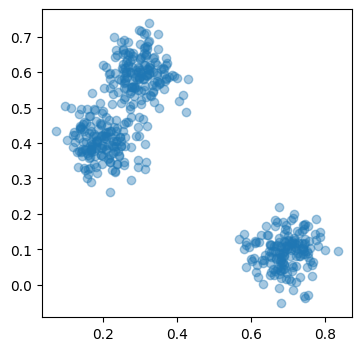

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Fijamos semilla para que los resultados sean reproducibles
np.random.seed(0)

# Generación de un dataset sintético
X, _ = make_blobs(
    n_samples=500, cluster_std=0.05,
    centers=[(0.2, 0.4), (0.7, 0.1), (0.3, 0.6)]
)
np.random.shuffle(X)

# Ploteamos los datos
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], alpha=0.4)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Construcción del algoritmo
kmeans = KMeans(n_clusters=3)

# Entrenamiento
kmeans.fit(X)

# Predicción
prediction = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


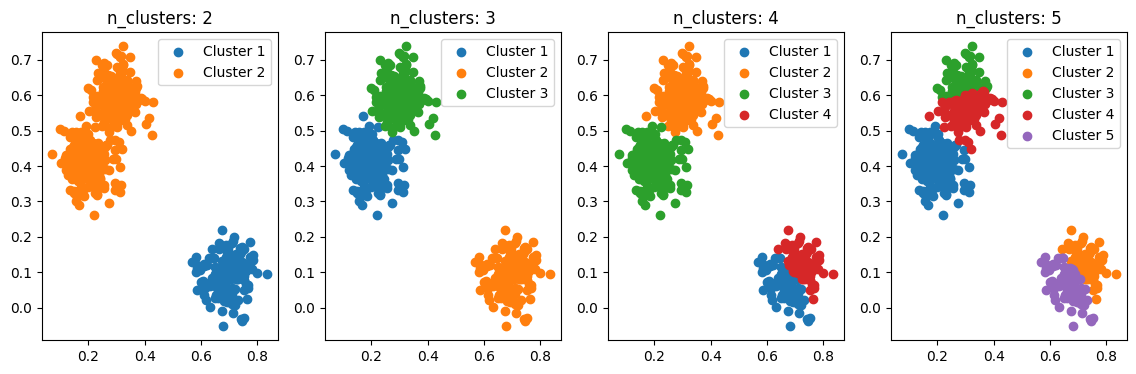

In [ ]:
n_clusters = [2, 3, 4, 5]

fig, axes = plt.subplots(1, len(n_clusters), figsize=(14, 4))

for n, ax in zip(n_clusters, axes):
  # Repetimos el entrenamiento para cada valor de n_clusters
  kmeans = KMeans(n_clusters=n, random_state=1)
  kmeans.fit(X)
  prediction = kmeans.predict(X)
  ax.set_title(f"n_clusters: {n}")

  for i in range(n):
    X_i = X[prediction == i]
    ax.scatter(X_i[:,0], X_i[:,1], label = f"Cluster {i+1}")

  ax.legend()

#### K-Medoids

El método de *k-medoids* es similar a k-means, sin embargo los *centroides* tienen que coincidir con una muestra real del dataset, pasandose a llamar *medoides* o medoids.

Esto permite una serie de ventajas:

- Es **menos sensitivo a *outliers***. El algoritmo de k-means, es muy sensible a valores anómalos en el dataset pudiendo cambiar significativamente la configuración de los clusters.

- Permite utilizar **métricas arbitrarias** para definir la *similitud* entre clústers, mientras que k-means generalmente esta limitado a la distancia euclidea para soluciones eficientes.

- En principio, permite **mayor interpretabilidad** al tener una muestra representativa real en cada uno de los clusters.

El mayor problema de k-medoids es la escalabilidad, ya que para datasets con muchas observaciones el tiempo de cómputo es muy elevado en general.

El algoritmo más utilizado es PAM (Partitioning around medodids) y es como sigue:

- Inicializamos los medoides seleccionando $k$ muestras aleatoriamente.

- Asignamos cada muestra al cluster del medoide más similar según la métrica elegida.

- Para cada uno de los medoides cogemos el resto de muestras "no medoide" y calculamos la función de coste a minimizar si esta fuera medoide y la otra no. Cambiamos el medoide por la muestra "no medoide" que minimice la función de coste.

- El algoritmo termina cuando ningún posible cambio de medoide a "no medoide" reduce el coste.

Los pasos de inicialización y asignación son similares a k-means, salvo que en este caso estamos obligados a inicializar con una muestra real.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/kmedoids1.png"></img>

Despues de la primera asignación calcularíamos nuestra *función de coste*. Si utilizamos la misma que en k-means, sería la varianza intra-cluster con respecto al medoide, aunque podríamos utilizar cualquiera.

Probamos a cambiar cada uno de los medoides y calculamos de nuevo el valor de la función de coste con la nueva asignación.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/kmedoids2.png"></img>

##### Ejemplo en `sklearn_extra`

In [ ]:
# Instalamos el paquete sklearn_extra, que contiene una implementación de
# k-medoids
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.1 MB/s eta 0:00:00


In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Vamos a utilizar el mismo dataset generado para k-means.
n_clusters = 3

# Entrenamos
kmedoids = KMedoids(n_clusters=n_clusters).fit(X)

# Predecimos
labels_kmedoids = kmedoids.predict(X)

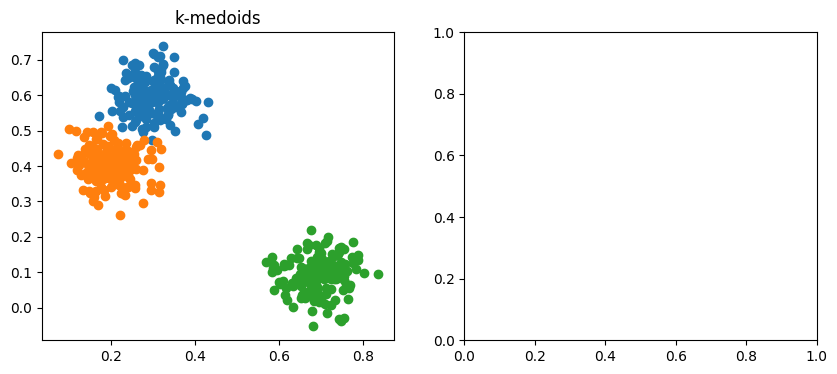

In [ ]:
np.random.seed(0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for c in range(n_clusters):
  ax1.set_title("k-medoids")
  ax1.scatter(
      X[labels_kmedoids == c, 0],
      X[labels_kmedoids == c, 1]
  )
plt.show()

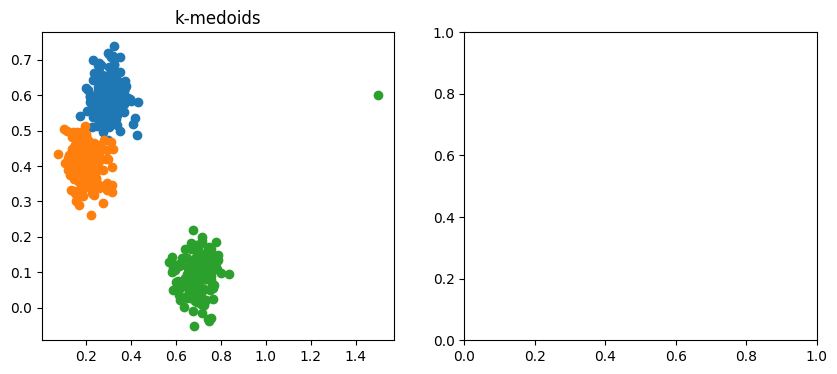

In [ ]:
X_noisy = X.copy()
X_noisy[0, :] = [1.5, 0.6]

n_clusters = 3

# Entrenamos
kmedoids = KMedoids(n_clusters=n_clusters).fit(X_noisy)

# Predecimos
labels_kmedoids = kmedoids.predict(X_noisy)

np.random.seed(0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for c in range(n_clusters):
  ax1.set_title("k-medoids")
  ax1.scatter(
      X_noisy[labels_kmedoids == c, 0],
      X_noisy[labels_kmedoids == c, 1]
  )
plt.show()

Al igual que en `Kmeans` podemos acceder a los *medoides* a través del atributo `cluster_centers_`.

### Detección de anomalias

#### Isolation Forest

El *Isolation Forest* es un algoritmo que utiliza árboles de decisión para la detección de anomalías.

La principal idea es que haciendo **particiones aleatorias entre el rango máximo y minimo de una variable**, las **muestras** que sean muy **distintas** del resto de los datos quedan, de media, en **profundidades inferiores** (más arriba del árbol) que el resto de muestras.

Al ser un proceso estocástico, **utilizamos más de un árbol entrenado de la misma manera** y calculamos, para cada muestra, la profundidad media del conjunto de árboles. Esto hace **más robusta** la detección de anomalías.



<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/isolation-forest.png"></img>

##### Ejemplo en `sklearn`

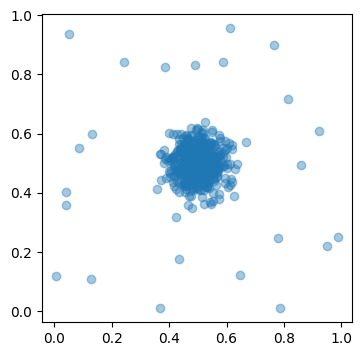

In [ ]:
from sklearn.datasets import make_blobs

# Fijamos semilla para que los resultados sean reproducibles
np.random.seed(0)

# Generación de un dataset sintético
data, _ = make_blobs(
    n_samples=500, cluster_std=0.05, centers=[(0.5, 0.5)])
noise = np.column_stack([np.random.rand(30), np.random.rand(30)])
X = np.row_stack([data, noise])
np.random.shuffle(X)

# Ploteamos los datos
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], alpha=0.4)
plt.show()

Los **hiperparámetros** más importantes del algoritmo son:

- `n_estimators`: Número de árboles a entrenar. En general a mayor número de árboles más robusta es la detección de anomalias, sin embargo más pesado es el modelo y mayor tiempo computaciónal consume. Por defecto son 100.

- `contamination`: Es el porcentaje de *outliers* o anomalías que se cree que hay presentes en el dataset. Se utiliza para determinar un umbral de detección. A mayor valor, el algoritmo es más estricto a la hora de determinar que una muestra no es una anomalia. Por defecto es 0.1 y tiene que estar en el rango [0, 0.5].

In [ ]:
from sklearn.ensemble import IsolationForest

# Construcción del algoritmo
forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=1)

# Entrenamiento
forest.fit(X)

# Predicción de anomalías
prediction = forest.predict(X)

En el caso de las algoritmos de detección de anomalías, el *output* del método predict es un array con valores `1` o `-1`, dónde `1` indica que el valor es normal y `-1` indica la presencia de una anomalía.

In [ ]:
prediction[:15]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Podemos observar el efecto del parámetro `contamination` probando con varios valores en el dataset.

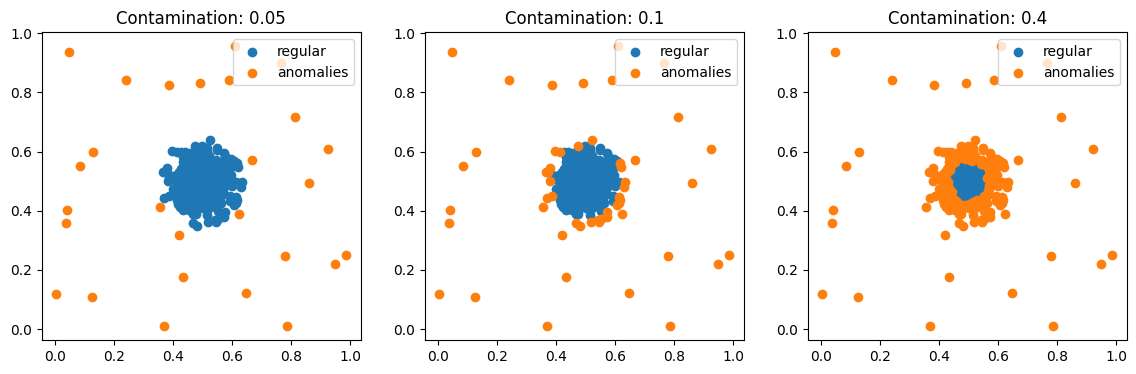

In [ ]:
contaminations = (0.05, 0.1, 0.4)

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for c, ax in zip(contaminations, axes):
  # Repetimos el entrenamiento para cada valor de contaminación
  forest = IsolationForest(n_estimators=100, contamination=c, random_state=1)
  forest.fit(X)
  prediction = forest.predict(X)
  ax.set_title(f"Contamination: {c}")

  # Dividimos la matriz de atributos entre observaciones regulares y outliers
  regular = X[prediction == 1]
  anomalies = X[prediction == -1]

  ax.scatter(regular[:,0], regular[:,1], label = "regular")
  ax.scatter(anomalies[:,0], anomalies[:,1], label = "anomalies")

  ax.legend()

Además de obtener la predicción determinada por el umbral elegido, podemos obtener un *score* para cada muestra, cuanto más bajo más probabilidad de que sea un *outlier*. Este *score* es independiente de `contamination`.

Este *score* es un cálculo en función de la profundidad media de una muestra en los árboles normalizado para un rango. Este cálculo se puede consultar en el [paper original](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest).

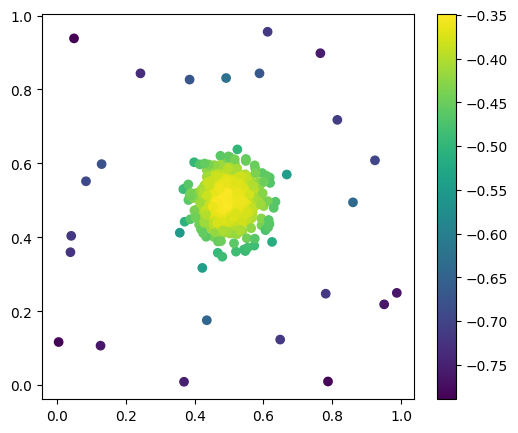

In [ ]:
score = forest.score_samples(X)

fig, ax = plt.subplots(figsize = (6,5))
scatter = plt.scatter(X[:,0], X[:,1], c=score)
plt.colorbar(scatter)
plt.show()

### Reducción dimensional

#### PCA (Principal Component Analysis)

El análisis de componentes principales o PCA es una técnica muy utilizada de **reducción dimensional**. Es una técnica lineal, es decir, solo captura **relaciones lineales** entre las variables.

<img width="300px" src="https://storage.googleapis.com/jz-example-data/img/varianza-covarianza.png"></img>

La **varianza** de una variable se expresa como:

$\sigma^2_x = \sum^n_{i=1}\frac{(x_i - \overline{x})^2}{n - 1}$

Notas:
- La varianza es siempre positiva.
- Depende de la escala de la variable.
- Se puede ver como una medida de la información que contiene una variable. *Una variable constante (varianza cero) no es informativa para un modelo*.



Por otro lado la **covarianza está definida entre dos variables**:

$s_{xy} = \sum^n_{i=1}\frac{(x_i - \overline{x})(y_i - \overline{y})}{n-1}$

Notas:

- La covarianza puede ser positiva o negativa.

- Una covarianza mayor que cero indica que las variables tienen una correlación lineal directa (cuando una variable aumenta la otra aumenta también)

- Una covarianza menor que cero indicaa lo contrario, cuando una variable aumenta la otra disminuye.

- Una covarianza igual a cero indica que no hay correlación lineal entre las dos variables.


La técnica de PCA busca encontrar unos ejes (llamados componentes principales) que consigan que la **covarianza entre cada par de variables sea cero**.

Adicionalmente estos ejes se **ordenan de mayor a menor varianza**, siendo los primeros componentes principales los que mayor información contienen.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/pca-transformation.png"></img>

Una vez definidos estos ejes, podemos **eliminar los componentes principales de menor varianza** para conseguir una reducción dimensional que conserva gran parte de la información original.

<img width="600px" src="https://storage.googleapis.com/jz-example-data/img/pca-proyeccion.png"></img>

##### Ejemplo en `sklearn`

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataset = load_breast_cancer()

X = dataset.data

# Normalizamos los datos a media 0 y varianza 1, de manera que los componentes
# sean comparables.

# El método fit transform es una utilidad que combina las operaciones fit y
# transform.
X_norm = StandardScaler().fit_transform(X)

# Construimos y entrenamos el algoritmo.
pca = PCA().fit(X_norm)

# Calculamos los datos proyectados en los nuevos ejes.
X_t = pca.transform(X_norm)

Podemos visualizar el porcentaje de varianza explicada por cada componente mediante el atributo `explained_variance_ratio`.

Este gráfico se puede interpretar como la información que retenemos del dataset original si únicamente nos quedamos con $n$ componentes.

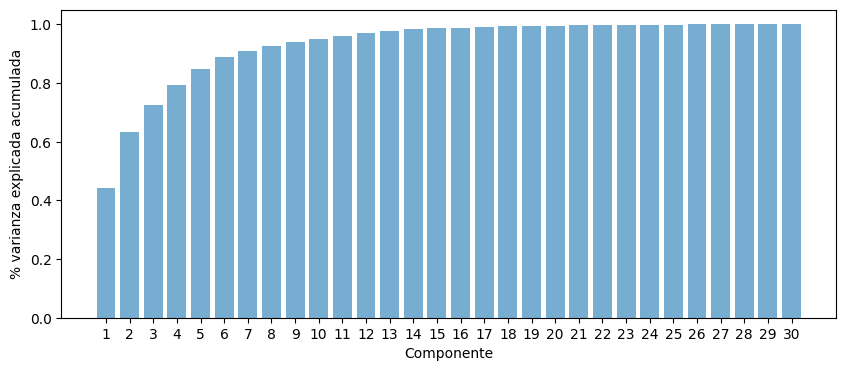

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.set_ylabel("% varianza explicada acumulada")
ax.set_xlabel("Componente")
ax.bar(
    [f"{i + 1}" for i in range(pca.n_components_)],
    np.cumsum(pca.explained_variance_ratio_),
    alpha = 0.6
)
plt.show()

En este caso, con el primer componente ya nos quedamos con aproximadamente un 42% de la información.

Si cogemos 15 componentes ya tendríamos prácticamente toda la información explicada. Esto quiere decir que si entrenamos un clasificador con únicamente las 15 primeras columnas del dataset transformado debería tener una *performance* similar a entrenarlo con las 30 columnas de los datos originales, con lo que habríamos reducido la dimensionalidad a la mitad.

También podemos obtener del objeto entrenado los *componentes*, que representan las direcciones de los nuevos ejes creados. También se puede interpretar como el peso que tiene cada variable original sobre cada variable transformada.

In [ ]:
pca.components_[:, 0]

array([ 0.21890244, -0.23385713, -0.00853124,  0.04140896,  0.03778635,
        0.01874079, -0.12408834, -0.0074523 , -0.22310976,  0.09548644,
        0.04147149,  0.05106746,  0.01196721,  0.05950613,  0.05111877,
       -0.15058388,  0.20292425,  0.14671234, -0.22538466, -0.04969866,
       -0.06857001,  0.0729289 , -0.09855269,  0.18257944,  0.0192265 ,
       -0.1294764 , -0.13152667,  0.21119401,  0.21146046, -0.70241409])

## Utilidades de Python

**f-strings**

Las [f-strings](https://realpython.com/python-f-strings/) son una funcionalidad que se añadió a `Python3.6` que permite formatear un *string* de una manera sencilla.

Para que se muestre una variable en el texto sólo es necesario poner una `f` delante del string y el nombre de la variable entre corchetes `{}`.

Además cuentan con una sintaxis para poder definir el número de decimales a mostrar o el número de cifras.


In [ ]:
variable = "Hola"
print(f"{variable} mundo!")

numero = 1.53424
print(f"El numero es {numero}.")
print(f"El numero con dos decimales es {numero:.2f}.")

Hola mundo!
El numero es 1.53424.
El numero con dos decimales es 1.53.


**zip**

La función `zip` es muy común en la programación en Python. Sirve para iterar sobre listas del mismo tamaño tomando en cada iteración un elemento de cada una de ellas.

In [ ]:
lista_1 = [1, 2, 3, 4]
lista_2 = ["a", "b", "c", "d"]
lista_3 = [(1, 2), (3, 4), (5, 6), (7, 8)]

for item_1, item_2, item_3 in zip(lista_1, lista_2, lista_3):
  print(item_1, item_2, item_3)

1 a (1, 2)
2 b (3, 4)
3 c (5, 6)
4 d (7, 8)


**pipelines**

Los [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) en sklearn son una utilidad para agrupar transformaciones y algoritmos en un solo objeto y poder trabajar con ellos con mayor facilidad.

Permite *encadenar* un número arbitrario de transformaciones y un estimador final (cualquier algoritmo con método `predict`) para facilitar la estructura de código.

Esto es útil sobre todo en aplicaciones más avanzadas con optimización de hiperparámetros o selección automática de variables.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris

# Cargamos en memoria la tabla de atributos de iris
X = load_iris().data

# Definimos nuestra `pipeline`.
# Queremos:
#  - Normalizar todas las columnas entre 0 y 1.
#  - Calcular las componentes principales y quedarnos con las 2 primeras.
#  - Hacer un clustering utilizando esas 2 componentes principales.

pipeline = Pipeline([
  ('normalizacion', MinMaxScaler(feature_range=(0, 1))),
  ('pca', PCA(n_components=2)),
  ('cluster', KMeans(n_clusters=3))
])

# Al llamar al método fit, internamente el código va a llamar al método fit
# de cada uno de los pasos, y le va a pasar al siguiente el valor de X
# transformado por el anterior para volver a llamar a fit.

pipeline.fit(X)

# Cuando llamemos al método predict, la tabla de datos va a ser transformada por
# el método transform de cada transformación y finalmente por el predict del
# estimador final.

cluster_labels = pipeline.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Ejercicio práctico

Una empresa de *retail* quiere categorizar su oferta de vinos blancos en 5 grupos, de manera que a los clientes les sea más fácil identificar vinos nuevos similares o los que ya les gustan.

Para ello cuentan con un dataset que contiene un vino de la oferta por cada fila y sus propiedades químicas por columnas, además de una columna con su calidad, que, en principio, no quieren que afecte a la agrupación ya que consideran que es una medida subjetiva.

Además de la agrupación, quieren tener un vino de referencia que represente la esencia de cada una de las categorias.

In [ ]:
DATA_URL = "https://storage.googleapis.com/jz-example-data/winequality-white.csv"
wine_data = pd.read_csv(DATA_URL, sep = ";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Solución

Dada la formulación del ejercicio parece claro que el problema se puede resolver con un *algoritmo de clustering*.

Como quieren obtener 5 categorias de vinos vamos a hacer una *clusterización con 5 grupos*.

Así mismo, dicen que quieren que haya un vino que represente al cluster, por lo que nos tendríamos que ir a un modelo cuyos *centroides correspondan con observaciones de la realidad, es decir, k-medoids*.

Si observamos los datos, vemos que cada una de las columnas son propiedades químicas, pero también tenmos la calidad en la columna `quality` por lo que antes de entrenar la clusterización la eliminamos.

In [ ]:
# Eliminamos la columna `quality` y nos guardamos el resultado en X
X = wine_data.drop("quality", axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


A continuación, vamos a normalizar los datos ya que vienen en distintas escalas, y en principio no tenemos ningún requerimiento de que alguna variable tiene que pesar mas que el resto en la clusterización.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Creamos el objeto encargado de escalar.
scaler = MinMaxScaler()

# Lo entrenamos y transformamos en el mismo paso, esto sería equivalente
# a llamar primero al metodo fit y luego al método transform.
X_t = scaler.fit_transform(X)

# scaler.fit(X)
# X_t = scaler.transform(X)

# Hay que tener en cuenta que una vez realizamos la transformación dejamos
# de tener un DataFrame de pandas y se convierte en una matriz directamente.
X_t

array([[0.30769231, 0.18627451, 0.21686747, ..., 0.25454545, 0.26744186,
        0.12903226],
       [0.24038462, 0.21568627, 0.20481928, ..., 0.52727273, 0.31395349,
        0.24193548],
       [0.41346154, 0.19607843, 0.24096386, ..., 0.49090909, 0.25581395,
        0.33870968],
       ...,
       [0.25961538, 0.15686275, 0.11445783, ..., 0.24545455, 0.27906977,
        0.22580645],
       [0.16346154, 0.20588235, 0.18072289, ..., 0.56363636, 0.18604651,
        0.77419355],
       [0.21153846, 0.12745098, 0.22891566, ..., 0.49090909, 0.11627907,
        0.61290323]])

A continuación entrenamos el algoritmo y sacamos una etiqueta para cada uno de los vinos que indique a qué cluster pertenece.

En un modelo de clustering, si no se van a hacer estimaciones a datos nuevos (asignar etiquetas a nuevos vinos) o se va a utilizar como paso previo a otro modelo supervisado, no es necesario dividir en sets de entrenamiento y set de test.

In [ ]:
from sklearn_extra.cluster import KMedoids

# Entrenamos utilizando el hiperparámetro n_clusters=5
kmedoids = KMedoids(n_clusters = 5).fit(X_t)

# Obtenemos las etiquetas para cada vino del modelo
labels = kmedoids.labels_

Una vez entrenado y obtenidas las etiquetas, tomamos los centroides de cada cluster para saber los vinos de referencia.

Podemos obtener los centros de los clusters como en k-means o directamente los indices con el atributo `medoid_indices_`


In [ ]:
# Generamos un array del mismo tamaño que el número de vinos indicando si es un
# medoid o no.

medoid_idx = kmedoids.medoid_indices_

is_center = np.zeros(X_t.shape[0])
is_center[medoid_idx] = 1

Asignamos las columnas calculadas al dataset original para poder estudiarlas.

In [ ]:
wine_data["is_center"] = is_center
wine_data["cluster_label"] = labels
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_center,cluster_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0.0,4
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0.0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0.0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0.0,4
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,4
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,3


Veamos los *vinos representativos de cada cluster*

In [ ]:
# Mostramos los vinos que son medoides ordenando por el id del cluster
medoids = wine_data[wine_data["is_center"] == 1].sort_values("cluster_label")
medoids = medoids.set_index("cluster_label")
medoids

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_center
cluster_label,,,,,,,,,,,,,
0,6.8,0.25,0.38,8.1,0.046,24.0,155.0,0.99560,3.33,0.59,10.2,6,1.0
1,6.3,0.30,0.24,6.6,0.040,38.0,141.0,0.99500,3.22,0.47,9.5,5,1.0
2,6.6,0.23,0.32,1.7,0.024,26.0,102.0,0.99084,3.29,0.60,11.8,6,1.0
3,6.9,0.31,0.32,1.6,0.036,34.0,114.0,0.99068,3.19,0.45,11.4,7,1.0
4,6.9,0.29,0.41,7.8,0.046,52.0,171.0,0.99537,3.12,0.51,9.6,5,1.0


El siguente paso sería analizar los clusters para darles una interpretación. En general en este tipo de modelos es mejor quedarse con menos variables para poder dar una mejor interpretación a los resultados.

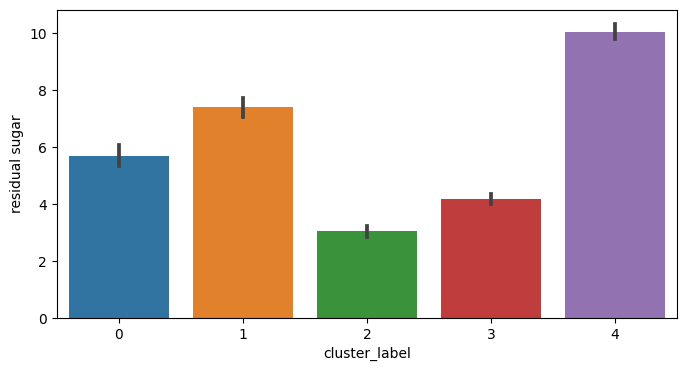

In [ ]:
import seaborn as sns

feature = "residual sugar"

fig, ax = plt.subplots(figsize = (8, 4))
feature_means = wine_data.groupby("cluster_label")[feature].mean()

ax.set_xlabel(feature)
sns.barplot(data = wine_data, y = feature, x = "cluster_label", ax=ax)

plt.show()

## Evaluación de la sesión

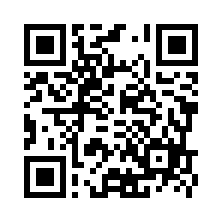